In [1]:
#!pip install dash
import pandas as pd
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("diabetes_data.csv")
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.shape

(70692, 18)

In [5]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [6]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [7]:
features = ['Sex', 'HighChol', 'Smoker', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'HighBP', 'PhysActivity', 'GenHlth']
target = 'Diabetes'

   Sex  Frequency
0  0.0      38386
1  1.0      32306



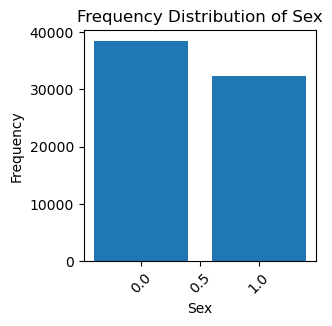

     Age  Frequency
0   10.0      10856
1    9.0      10112
2    8.0       8603
3   11.0       8044
4    7.0       6872
5   13.0       5426
6   12.0       5394
7    6.0       4648
8    5.0       3520
9    4.0       2793
10   3.0       2049
11   2.0       1396
12   1.0        979



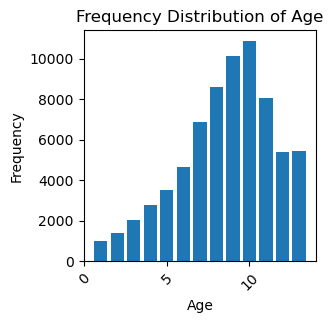

   HighChol  Frequency
0       1.0      37163
1       0.0      33529



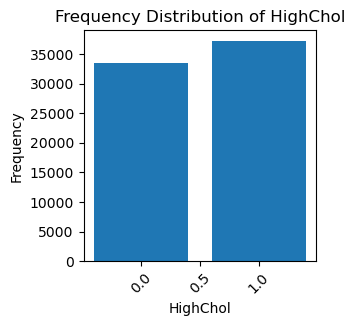

   Smoker  Frequency
0     0.0      37094
1     1.0      33598



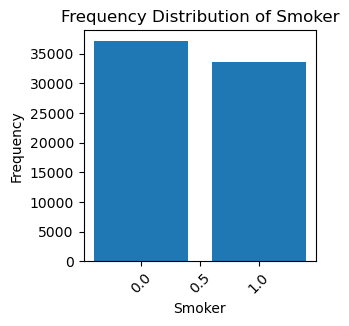

   HeartDiseaseorAttack  Frequency
0                   0.0      60243
1                   1.0      10449



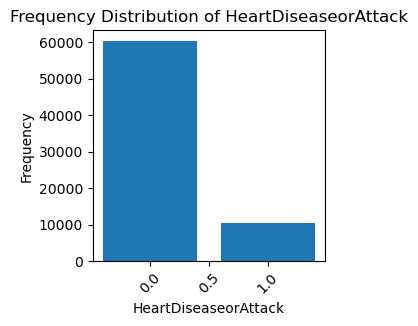

   HvyAlcoholConsump  Frequency
0                0.0      67672
1                1.0       3020



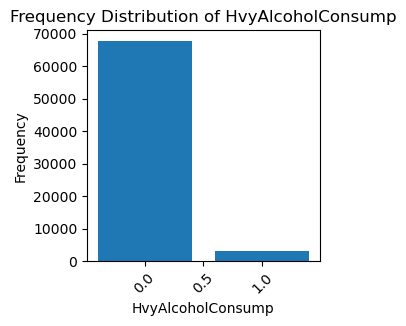

   GenHlth  Frequency
0      3.0      23427
1      2.0      19872
2      4.0      13303
3      1.0       8282
4      5.0       5808



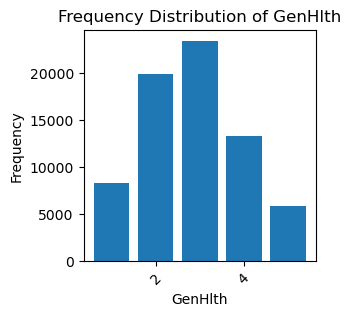

    MentHlth  Frequency
0        0.0      48091
1       30.0       4320
2        2.0       3267
3        5.0       2519
4        1.0       2051
5        3.0       1967
6       10.0       1924
7       15.0       1767
8       20.0       1125
9        4.0        981
10       7.0        825
11      25.0        425
12      14.0        353
13       6.0        288
14       8.0        198
15      12.0        130
16      28.0         99
17      21.0         84
18      29.0         53
19      18.0         42
20      16.0         28
21       9.0         28
22      22.0         22
23      17.0         18
24      26.0         17
25      27.0         17
26      13.0         15
27      23.0         13
28      24.0         10
29      11.0          8
30      19.0          7



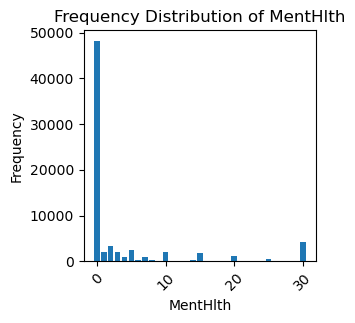

    PhysHlth  Frequency
0        0.0      39915
1       30.0       7953
2        2.0       4102
3        1.0       2853
4        3.0       2438
5        5.0       2332
6       10.0       1980
7       15.0       1913
8        4.0       1376
9        7.0       1326
10      20.0       1292
11      14.0        802
12      25.0        557
13       6.0        447
14       8.0        276
15      21.0        229
16      28.0        211
17      12.0        205
18      29.0         95
19       9.0         55
20      18.0         50
21      16.0         50
22      17.0         35
23      27.0         34
24      22.0         31
25      23.0         27
26      26.0         26
27      13.0         26
28      24.0         24
29      11.0         22
30      19.0         10



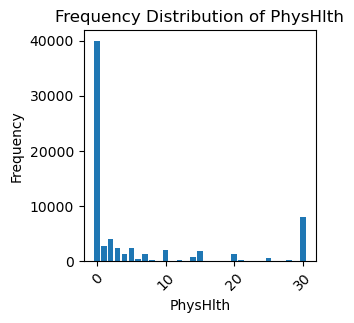

   DiffWalk  Frequency
0       0.0      52826
1       1.0      17866



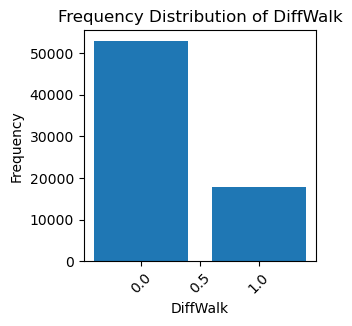

   Stroke  Frequency
0     0.0      66297
1     1.0       4395



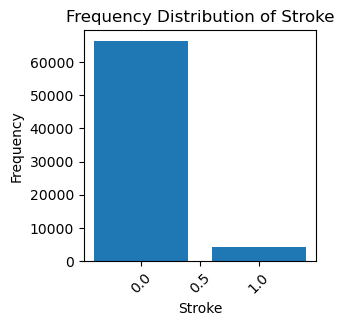

   HighBP  Frequency
0     1.0      39832
1     0.0      30860



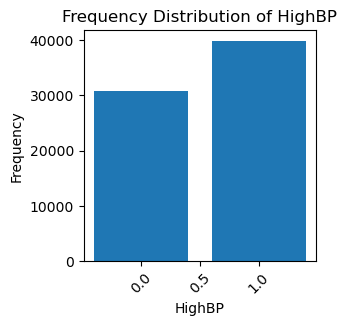

In [8]:
categorical_features = ['Sex', 'Age', 'HighChol', 'Smoker', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP']
for column in categorical_features:
    freq_table = df[column].value_counts().reset_index()
    freq_table.columns = [column, 'Frequency']
    print(freq_table)
    print()

    # Create a bar plot for the frequency distribution
    plt.figure(figsize=(3, 3))
    plt.bar(freq_table[column], freq_table['Frequency'])
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
df.columns 
#print(df.dtypes)

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [11]:
def detect_categorical_outliers(df, column):
    category_counts = df[column].value_counts()
    threshold = 0.05 * len(df) 
    outliers = category_counts[category_counts < threshold]
    outlier_df = df[df[column].isin(outliers.index)]
    return outlier_df

for column in df.select_dtypes(include='object'):
    print(f"\nOutliers in '{column}':")
    outlier_df = detect_categorical_outliers(df, column)
    print(outlier_df)
detect_categorical_outliers(df, features)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
external_predictors = ['HighChol', 'Smoker', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'HighBP']
outcome = 'Diabetes'
df['Intercept'] = 1
logit_model = sm.Logit(df[outcome], df[external_predictors])
logit_results_external_predictors = logit_model.fit()
print(logit_results_external_predictors.summary())

Optimization terminated successfully.
         Current function value: 0.640211
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70687
Method:                           MLE   Df Model:                            4
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                 0.07637
Time:                        11:37:22   Log-Likelihood:                -45258.
converged:                       True   LL-Null:                       -49000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighChol                 0.2228      0.016     14.259      0.000       0.192       0.253

In [13]:
coefficients = logit_results_external_predictors.params
std_errors = logit_results_external_predictors.bse

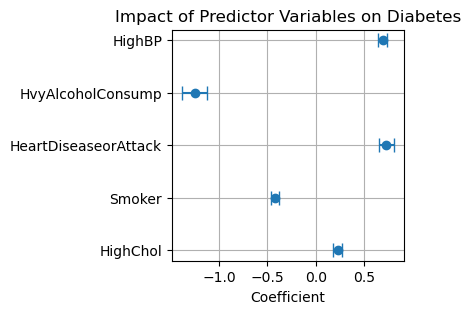

In [14]:
plt.figure(figsize=(3, 3))
plt.errorbar(coefficients, range(len(coefficients)), xerr=3*std_errors, fmt='o', capsize=5)
plt.yticks(range(len(external_predictors)), external_predictors)
plt.xlabel('Coefficient')
plt.title('Impact of Predictor Variables on Diabetes')
plt.grid(True)
plt.show()

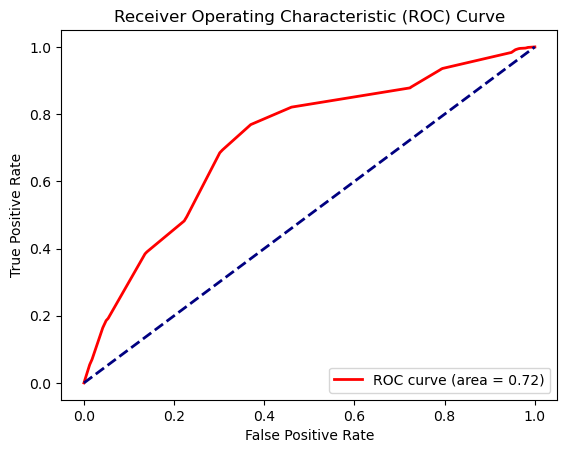

In [15]:
threshold = 0.5
predictions = logit_results_external_predictors.predict(df[external_predictors])
predicted_classes = (predictions > threshold).astype(int)

fpr, tpr, thresholds = roc_curve(df[outcome], predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
df['age_group'] = ''
for i in range(len(df)):
    age = df.loc[i, 'Age']
    if age < 8:
        df.loc[i, 'age_group'] = '18 to 24'
    elif age >= 13:
        df.loc[i, 'age_group'] = '80 or older'
    else:
        df.loc[i, 'age_group'] = '60 to 64'
print(df)

        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth 

In [17]:
diabetes_df = df[df['Diabetes'] == 1]
male_diabetes_count = diabetes_df[diabetes_df['Sex'] == 1].shape[0]
female_diabetes_count = diabetes_df[diabetes_df['Sex'] == 0].shape[0]
diabetes_df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,Intercept,age_group
35346,9.0,0.0,1.0,1.0,30.0,1.0,1.0,0.0,1.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,1.0,1.0,1,60 to 64
35347,13.0,1.0,0.0,1.0,25.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1,80 or older
35348,11.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,1,60 to 64
35349,7.0,1.0,0.0,1.0,23.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1,18 to 24
35350,13.0,0.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,80 or older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1,18 to 24
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1,60 to 64
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0,1,80 or older
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,1,60 to 64


In [18]:
print("Number of males with diabetes:", male_diabetes_count)
print("Number of females with diabetes:", female_diabetes_count)

Number of males with diabetes: 16935
Number of females with diabetes: 18411


In [19]:
male_high_bp_proportion = diabetes_df[(diabetes_df['Sex'] == 1) & (diabetes_df['HighBP'] == 1)].shape[0]
female_high_bp_proportion = diabetes_df[(diabetes_df['Sex'] == 0) & (diabetes_df['HighBP'] == 1)].shape[0]

print("Proportion of males with high blood pressure:", male_high_bp_proportion)
print("Proportion of females with high blood pressure:", female_high_bp_proportion)

Proportion of males with high blood pressure: 12699
Proportion of females with high blood pressure: 13905


In [20]:
high_bp_proportion= df[(df['HighBP'] == 1) & (df['Diabetes'] == 1)]
heart_disease_proportion = df[(df['HeartDiseaseorAttack']==1) & (df['Diabetes']==1)]
high_chol_proportion=df[(df['HighChol']==1) & (df['Diabetes']==1)]
age_groups_stats = diabetes_df.groupby('age_group').agg(
    high_bp_proportion=('HighBP', 'mean'),
    heart_disease_proportion=('HeartDiseaseorAttack', 'mean'),
    high_chol_proportion=('HighChol', 'mean')
)

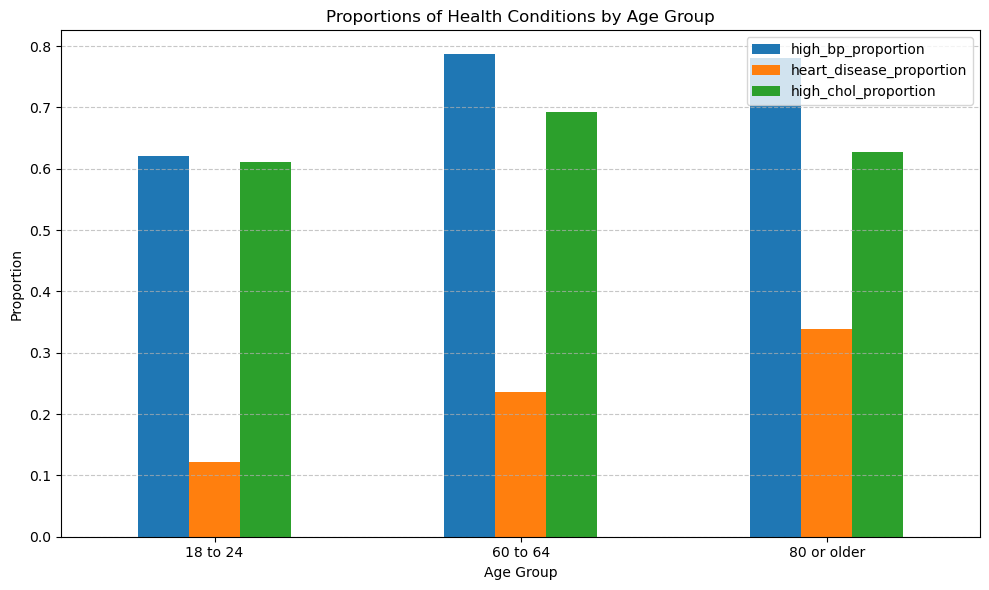

In [21]:
age_groups_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Proportions of Health Conditions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
for i in range(len(df)):
    a = df.loc[i, 'PhysHlth']
    if a < 10:
        df.loc[i, 'PhysHlth'] = 1
    elif a > 20:
        df.loc[i, 'PhysHlth'] = 3
    else:
        df.loc[i, 'PhysHlth'] = 2 

In [23]:
df.head(20)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,Intercept,age_group
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,3.0,0.0,0.0,1.0,0.0,1,18 to 24
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,1,60 to 64
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1,80 or older
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1,60 to 64
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1,60 to 64
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,1,18 to 24
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,80 or older
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1,18 to 24
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1,18 to 24
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1,18 to 24


In [24]:
health_predictors = ['PhysActivity','GenHlth','MentHlth', 'PhysHlth', 'DiffWalk','Stroke']
outcome = 'Diabetes'
df['Intercept'] = 1
logit_model = sm.Logit(df[outcome], df[health_predictors])
logit_results_health_predictors = logit_model.fit()
print(logit_results_health_predictors.summary())

Optimization terminated successfully.
         Current function value: 0.623951
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70686
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                 0.09983
Time:                        11:37:37   Log-Likelihood:                -44108.
converged:                       True   LL-Null:                       -49000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
PhysActivity    -0.9015      0.015    -58.743      0.000      -0.932      -0.871
GenHlth          0.4098

In [25]:
coefficients = logit_results_health_predictors.params
std_errors = logit_results_health_predictors.bse

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


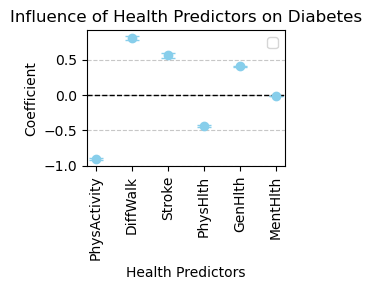

In [26]:
coefficients_sorted = coefficients.abs().sort_values(ascending=False)
standard_errors_sorted = std_errors[coefficients_sorted.index]

# Plot the coefficients with error bars
plt.figure(figsize=(3, 3))
plt.errorbar(
    x=coefficients_sorted.index,
    y=coefficients[coefficients_sorted.index],
    yerr=standard_errors_sorted,
    fmt='o',
    color='skyblue',
    capsize=5,
)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Influence of Health Predictors on Diabetes')
plt.xlabel('Health Predictors')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

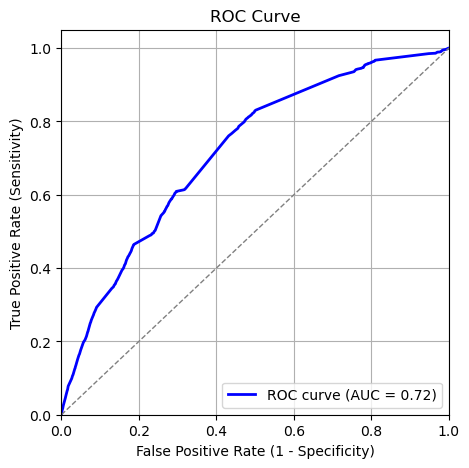

In [27]:
# Predict probabilities for the positive class (Diabetes)
predicted_probabilities = logit_results_health_predictors.predict(df[health_predictors])

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df[outcome], predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [28]:
age_groups = diabetes_df.groupby('age_group').agg('PhysHlth')
print(age_groups)

In [29]:
food_intake_predictors=['Fruits','Veggies']
outcome = 'Diabetes'
df['Intercept'] = 1
logit_model = sm.Logit(df[outcome], df[food_intake_predictors])
logit_results_food_intake_predictors = logit_model.fit()
print(logit_results_food_intake_predictors.summary())

Optimization terminated successfully.
         Current function value: 0.692441
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70690
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                0.001018
Time:                        11:37:41   Log-Likelihood:                -48950.
converged:                       True   LL-Null:                       -49000.
Covariance Type:            nonrobust   LLR p-value:                 1.703e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Fruits        -0.0361      0.015     -2.423      0.015      -0.065      -0.007
Veggies       -0.0579      0.

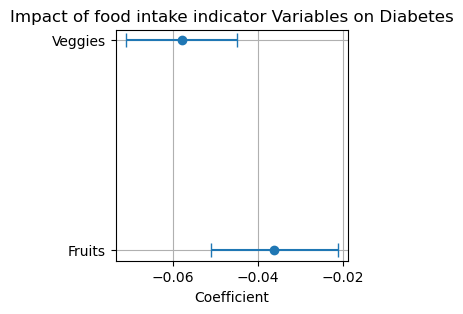

In [30]:
coefficients = logit_results_food_intake_predictors.params
std_errors = logit_results_food_intake_predictors.bse
plt.figure(figsize=(3, 3))
plt.errorbar(coefficients, range(len(coefficients)), xerr=std_errors, fmt='o', capsize=5)
plt.yticks(range(len(food_intake_predictors)), food_intake_predictors)
plt.xlabel('Coefficient')
plt.title('Impact of food intake indicator Variables on Diabetes')
plt.grid(True)
plt.show()

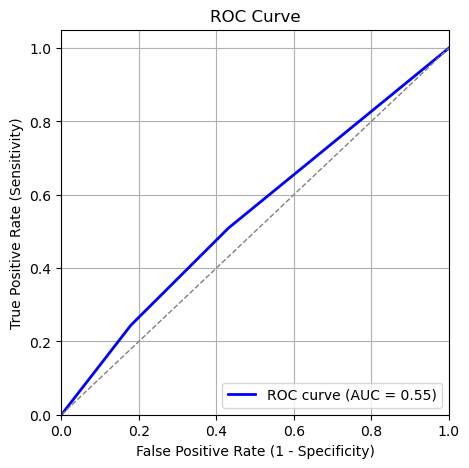

In [31]:
# Predict probabilities for the positive class (Diabetes)
predicted_probabilities = logit_results_food_intake_predictors.predict(df[food_intake_predictors])

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df[outcome], predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

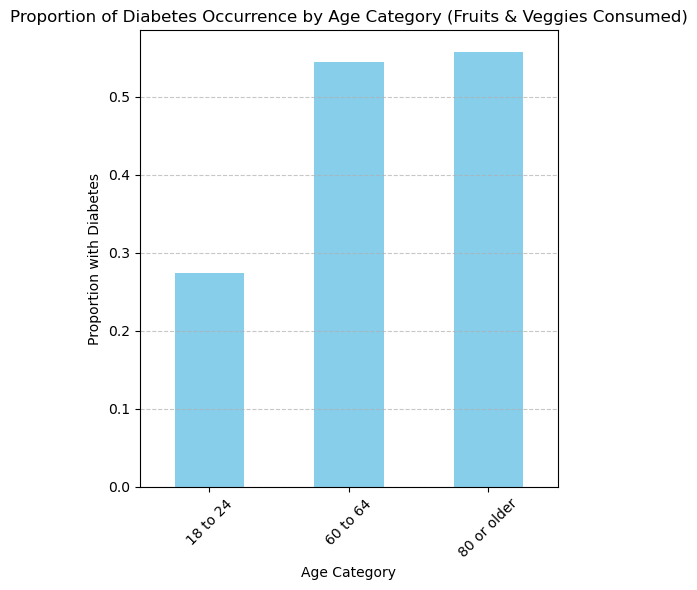

In [32]:
subset_data = df[['Age', 'Diabetes', 'Fruits', 'Veggies','age_group']]

subset_data = subset_data[(subset_data['Fruits'] == 1) & (subset_data['Veggies'] == 1)]

diabetes_proportions = subset_data.groupby('age_group')['Diabetes'].mean()

plt.figure(figsize=(5, 6))
diabetes_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Diabetes Occurrence by Age Category (Fruits & Veggies Consumed)')
plt.xlabel('Age Category')
plt.ylabel('Proportion with Diabetes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
X = df.drop(['Diabetes','age_group'], axis=1)  
y = df['Diabetes']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the random forest classifier
gbm_classifier = GradientBoostingClassifier()

# Train the classifier
gbm_classifier.fit(X_train, y_train)


GradientBoostingClassifier()

In [37]:
# Predict on the test set
gbm_pred = gbm_classifier.predict(X_test)

# Calculate accuracy
print("GBM Accuracy:", accuracy_score(y_test, gbm_pred))

# Print classification report
print(classification_report(y_test, gbm_pred))

GBM Accuracy: 0.7527406464389278
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [38]:
# Extracting values from the classification report
support_0 = 7090
support_1 = 7049
precision_0 = 0.78
precision_1 = 0.73

# Calculating False Positives and False Negatives
FP = support_0 * (1 - precision_0)
FN = support_1 * (1 - precision_1)

# Calculating Specificity and Sensitivity
specificity = 7090 / (7090 + FP)
sensitivity = 7049 / (7049 + FN)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Specificity: 0.819672131147541
Sensitivity: 0.7874015748031497


In [39]:
df=pd.read_csv("diabetes_data.csv")
# Define age groups for the analysis
df['age_group'] = pd.cut(df['Age'], bins=[18, 24, 64, 100], labels=['18-24', '25-64', '65+'])

# Calculate proportion of diabetes occurrence by age group
diabetes_proportions = df.groupby('age_group')['Diabetes'].mean().reset_index()

# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Diabetes Analysis Dashboard"),
    
    # Dropdown for selecting age group
    html.H2("Select Age Group"),
    dcc.Dropdown(
        id='age-group-dropdown',
        options=[
            {'label': '18-24', 'value': '18-24'},
            {'label': '25-64', 'value': '25-64'},
            {'label': '65+', 'value': '65+'}
        ],
        value='18-24'  # Default value
    ),
    
    # Input fields for external predictors
    html.H2("Enter External Predictors"),
    html.Label("High Cholesterol"),
    dcc.Input(id='input-high-chol', type='number', value=0),
    html.Label("Smoker"),
    dcc.Input(id='input-smoker', type='number', value=0),
    html.Label("Heart Disease or Attack"),
    dcc.Input(id='input-heart-disease', type='number', value=0),
    html.Label("Heavy Alcohol Consumption"),
    dcc.Input(id='input-heavy-alcohol', type='number', value=0),
    html.Label("High Blood Pressure"),
    dcc.Input(id='input-high-bp', type='number', value=0),
    
    # Input fields for health predictors
    html.H2("Enter Health Predictors"),
    html.Label("Physical Activity"),
    dcc.Input(id='input-phys-activity', type='number', value=0),
    html.Label("General Health"),
    dcc.Input(id='input-gen-health', type='number', value=0),
    html.Label("Mental Health"),
    dcc.Input(id='input-mental-health', type='number', value=0),
    html.Label("Physical Health"),
    dcc.Input(id='input-phys-health', type='number', value=0),
    html.Label("Difficulty Walking"),
    dcc.Input(id='input-diff-walk', type='number', value=0),
    html.Label("Stroke"),
    dcc.Input(id='input-stroke', type='number', value=0),
    
    # Input fields for food intake predictors
    html.H2("Enter Food Intake Predictors"),
    html.Label("Fruits"),
    dcc.Input(id='input-fruits', type='number', value=0),
    html.Label("Vegetables"),
    dcc.Input(id='input-vegetables', type='number', value=0),
    
    # Probability of having diabetes based on predictors
    html.H2("Probability of Having Diabetes"),
    html.Div(id='probability-output'),
])

# Callback to calculate probability of having diabetes
@app.callback(
    Output('probability-output', 'children'),
    [Input('age-group-dropdown', 'value'),
     Input('input-high-chol', 'value'),
     Input('input-smoker', 'value'),
     Input('input-heart-disease', 'value'),
     Input('input-heavy-alcohol', 'value'),
     Input('input-high-bp', 'value'),
     Input('input-phys-activity', 'value'),
     Input('input-gen-health', 'value'),
     Input('input-mental-health', 'value'),
     Input('input-phys-health', 'value'),
     Input('input-diff-walk', 'value'),
     Input('input-stroke', 'value'),
     Input('input-fruits', 'value'),
     Input('input-vegetables', 'value')]
)
def calculate_probability(age_group, high_chol, smoker, heart_disease, heavy_alcohol, high_bp, phys_activity, gen_health, mental_health, phys_health, diff_walk, stroke, fruits, vegetables):
    # Filter data based on selected age group
    filtered_df = df[df['age_group'] == age_group]
    
    # Calculate probability based on external predictors
    ext_predictors_values = [float(high_chol), float(smoker), float(heart_disease), float(heavy_alcohol), float(high_bp)]
    ext_predictors_coefficients = logit_results_external_predictors.params
    ext_predictors_values_coefficients = [a*b for a, b in zip(ext_predictors_values, ext_predictors_coefficients)]
    ext_probability = 1 / (1 + pow(2.71828, -sum(ext_predictors_values_coefficients)))
    
    # Calculate probability based on health predictors
    health_predictors_values = [float(phys_activity), float(gen_health), float(mental_health), float(phys_health), float(diff_walk), float(stroke)]
    health_predictors_coefficients = logit_results_health_predictors.params
    health_predictors_values_coefficients = [a*b for a, b in zip(health_predictors_values, health_predictors_coefficients)]
    health_probability = 1 / (1 + pow(2.71828, -sum(health_predictors_values_coefficients)))
    
    # Calculate probability based on food intake predictors
    food_intake_predictors_values = [float(fruits), float(vegetables)]
    food_intake_predictors_coefficients = logit_results_food_intake_predictors.params
    food_intake_predictors_values_coefficients = [a*b for a, b in zip(food_intake_predictors_values, food_intake_predictors_coefficients)]
    food_intake_probability = 1 / (1 + pow(2.71828, -sum(food_intake_predictors_values_coefficients)))
    
    # Total probability
    total_probability = (ext_probability + health_probability + food_intake_probability) / 3
    
    return html.Div([
        html.Div(f"Probability based on External Predictors: {ext_probability:.2f}"),
        html.Div(f"Probability based on Health Predictors: {health_probability:.2f}"),
        html.Div(f"Probability based on Food Intake Predictors: {food_intake_probability:.2f}"),
        html.Div(f"Total Probability of Having Diabetes: {total_probability:.2f}")
    ])
# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_23292\4076450640.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

